https://devopedia.org/word2vec

<img src='https://devopedia.org/images/article/221/4080.1570464995.png'>

<img src='https://devopedia.org/images/article/221/9585.1570465059.png'>

In [1]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [5]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [6]:
corpus = remove_stop_words(corpus)

In [7]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [8]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words) #set : 순서가 없고, 집합 안에서는 unique한 값을 가짐

In [9]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [10]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [11]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [12]:
df

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [13]:
df.shape

(52, 2)

In [14]:
word2int

{'queen': 0,
 'king': 1,
 'boy': 2,
 'pretty': 3,
 'princess': 4,
 'girl': 5,
 'young': 6,
 'prince': 7,
 'woman': 8,
 'man': 9,
 'wise': 10,
 'strong': 11}

In [15]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [16]:
X_train

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [17]:
Y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [18]:
x = tf.constant( X_train, tf.float32)
y_label = tf.constant( Y_train, tf.float32)

In [19]:
ONE_HOT_DIM

12

In [20]:
EMBEDDING_DIM = 2 

initX =tf.initializers.GlorotUniform()
W1 = tf.Variable( initX(shape=[ONE_HOT_DIM, EMBEDDING_DIM] ) ) #[피쳐의갯수, 라벨의갯수]
b1 = tf.Variable( initX(shape=[1] ) ) #[라벨의갯수]

W2 = tf.Variable(initX(shape=[EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(initX(shape=[1]))


In [21]:
def compute_loss():
    hidden_layer = tf.add(tf.matmul(x,W1), b1)
    z = tf.add( tf.matmul(hidden_layer, W2), b2)

    #     loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(z), axis=[1]))
    cost_i = tf.nn.softmax_cross_entropy_with_logits( labels=y_label, logits=z )
    cost = tf.reduce_mean( cost_i )
    return cost

In [22]:
hist_cost = []
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[ W1,b1, W2,b2 ] )
    c = compute_loss().numpy()
    hist_cost.append( c )
    print( i,'코스트',c )

0 코스트 2.473591
1 코스트 2.4354062
2 코스트 2.4078984
3 코스트 2.3783884
4 코스트 2.3432372
5 코스트 2.3048215
6 코스트 2.2678342
7 코스트 2.2353582
8 코스트 2.20614
9 코스트 2.1794417
10 코스트 2.157454
11 코스트 2.1379783
12 코스트 2.1154845
13 코스트 2.0885673
14 코스트 2.0603805
15 코스트 2.0346575
16 코스트 2.0125124
17 코스트 1.9926618
18 코스트 1.9736944
19 코스트 1.9552823
20 코스트 1.9382656
21 코스트 1.9233733
22 코스트 1.9107192
23 코스트 1.9006547
24 코스트 1.8940437
25 코스트 1.8911852
26 코스트 1.8899947
27 코스트 1.8871784
28 코스트 1.8819741
29 코스트 1.8756204
30 코스트 1.8687274
31 코스트 1.8611227
32 코스트 1.8532709
33 코스트 1.8464535
34 코스트 1.8415475
35 코스트 1.8383257
36 코스트 1.8357198
37 코스트 1.8325677
38 코스트 1.8284391
39 코스트 1.8239535
40 코스트 1.8200864
41 코스트 1.8166827
42 코스트 1.8124392
43 코스트 1.8072011
44 코스트 1.8022766
45 코스트 1.7981353
46 코스트 1.7940451
47 코스트 1.7897668
48 코스트 1.7858628
49 코스트 1.7826666
50 코스트 1.7798451
51 코스트 1.7769585
52 코스트 1.774056
53 코스트 1.7716644
54 코스트 1.7700474
55 코스트 1.7685227
56 코스트 1.7664855
57 코스트 1.764252
58 코스트 1.7622014
59 코스트 1.7602

496 코스트 1.643214
497 코스트 1.6431081
498 코스트 1.6430318
499 코스트 1.6429865
500 코스트 1.6429871
501 코스트 1.6430846
502 코스트 1.6432469
503 코스트 1.643596
504 코스트 1.6440339
505 코스트 1.6450261
506 코스트 1.6460292
507 코스트 1.6483371
508 코스트 1.6493452
509 코스트 1.6520121
510 코스트 1.6498733
511 코스트 1.6486379
512 코스트 1.6451293
513 코스트 1.6430204
514 코스트 1.6424253
515 코스트 1.6432326
516 코스트 1.6449789
517 코스트 1.6453108
518 코스트 1.6454616
519 코스트 1.6440066
520 코스트 1.642955
521 코스트 1.6423736
522 코스트 1.6424454
523 코스트 1.642906
524 코스트 1.6429499
525 코스트 1.6430062
526 코스트 1.6424056
527 코스트 1.6419634
528 코스트 1.641713
529 코스트 1.6418122
530 코스트 1.6420314
531 코스트 1.6422366
532 코스트 1.6422919
533 코스트 1.6419828
534 코스트 1.6416482
535 코스트 1.6411872
536 코스트 1.6408734
537 코스트 1.6406782
538 코스트 1.6406262
539 코스트 1.6406872
540 코스트 1.6408312
541 코스트 1.6410016
542 코스트 1.6411889
543 코스트 1.6413586
544 코스트 1.6415182
545 코스트 1.6416872
546 코스트 1.6418799
547 코스트 1.6421782
548 코스트 1.6425786
549 코스트 1.6431806
550 코스트 1.6437552
551 코스트 1.64403

994 코스트 1.6267407
995 코스트 1.6266809
996 코스트 1.6268317
997 코스트 1.6269467
998 코스트 1.6274095
999 코스트 1.6277133


In [23]:
W1.numpy()

array([[ -1.927372  ,  -0.37849942],
       [ -0.24947079,  -0.9150484 ],
       [  0.47907755,  -0.46033883],
       [-12.578316  ,  18.359442  ],
       [ -6.4073834 ,  14.155185  ],
       [ -2.0410957 ,   0.23970108],
       [ -1.3039383 ,  -1.2475456 ],
       [ 14.212931  ,   7.130325  ],
       [ -1.6760806 ,  -0.9364598 ],
       [ -0.41424167,  -1.0292464 ],
       [ -9.920579  ,  16.85819   ],
       [ 20.014515  ,   7.554128  ]], dtype=float32)

In [24]:
vectors =(W1+b1).numpy()

In [25]:
vectors #임베딩값

array([[ -0.5577723 ,   0.9911003 ],
       [  1.1201289 ,   0.45455128],
       [  1.8486773 ,   0.90926087],
       [-11.208716  ,  19.729042  ],
       [ -5.0377836 ,  15.524784  ],
       [ -0.67149603,   1.6093007 ],
       [  0.06566143,   0.1220541 ],
       [ 15.58253   ,   8.499925  ],
       [ -0.30648088,   0.43313992],
       [  0.955358  ,   0.34035325],
       [ -8.55098   ,  18.22779   ],
       [ 21.384115  ,   8.923728  ]], dtype=float32)

In [26]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = list(words)
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,queen,-0.557772,0.991100
1,king,1.120129,0.454551
2,boy,1.848677,0.909261
3,pretty,-11.208716,19.729042
4,princess,-5.037784,15.524784
5,girl,-0.671496,1.609301
6,young,0.065661,0.122054
7,prince,15.582530,8.499925
8,woman,-0.306481,0.433140
9,man,0.955358,0.340353


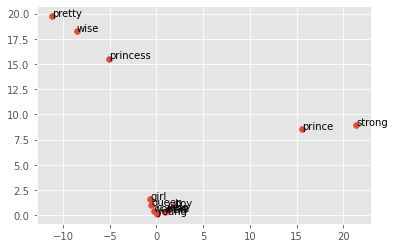

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.scatter(w2v_df['x1'],w2v_df['x2'] )
for  x,y,t in zip( w2v_df['x1'],w2v_df['x2'],w2v_df['word']):
    plt.text(x,y,t)
plt.show()